In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [27]:
np.random.seed(2)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

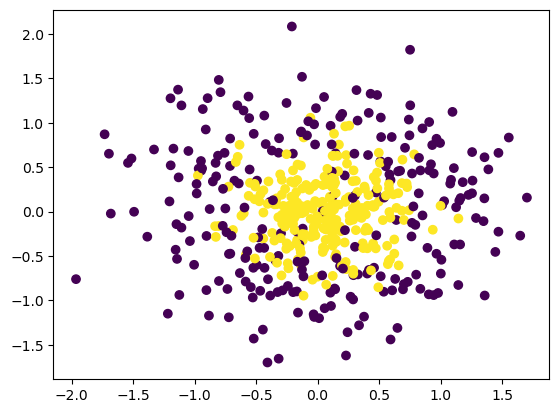

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [29]:
ada = AdaBoostClassifier()
np.mean(cross_val_score(ada, X, y, scoring='accuracy', cv=10))

0.786

In [30]:
ada.fit(X,y)

AdaBoostClassifier()

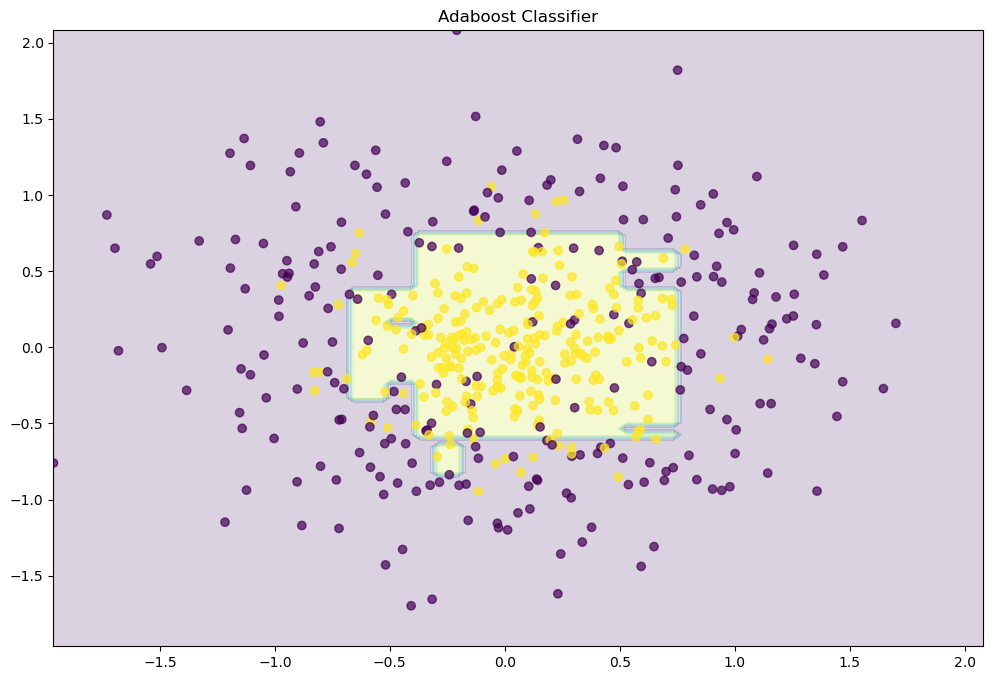

In [31]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(ada)

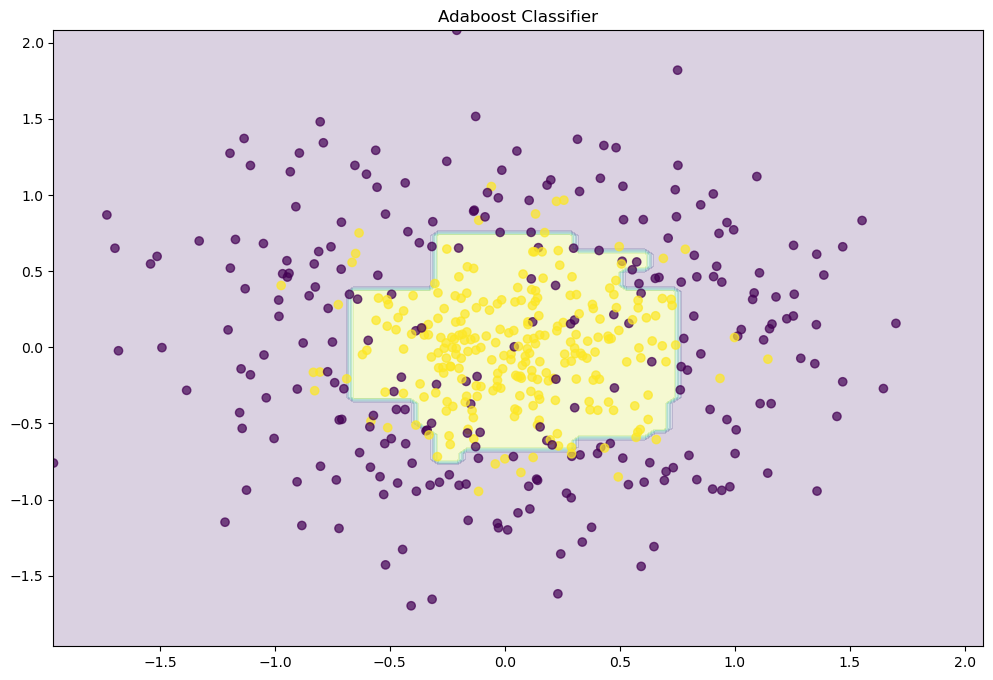

In [39]:
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
ada.fit(X, y)
plot_decision_boundary(ada)

In [33]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_cv = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

In [34]:
grid_result = grid_cv.fit(X, y)

In [35]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


In [36]:
ada1 = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, algorithm='SAMME')

In [37]:
ada1.fit(X,y)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500)

In [38]:
np.mean(cross_val_score(ada1, X, y, scoring='accuracy', cv=10))

0.8320000000000001